In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Problem Statement

## Data Gathering

In [2]:
z=r"C:\Users\ASUS\Downloads\bank-full.xlsx"
a=pd.read_excel(z)
a

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## EDA

In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
a.shape

(45211, 17)

In [5]:
a.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
a.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
a["job"].nunique()

12

In [8]:
a["previous"].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [9]:
a["marital"].nunique()

3

In [10]:
a["education"].nunique()

4

In [11]:
a["default"].nunique()

2

In [12]:
a["housing"].nunique()

2

In [13]:
a["loan"].unique()

array(['no', 'yes'], dtype=object)

In [14]:
a["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [15]:
a["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [16]:
a["month"].nunique()

12

In [17]:
a["poutcome"].nunique()

4

In [18]:
a["y"].unique()

array(['no', 'yes'], dtype=object)

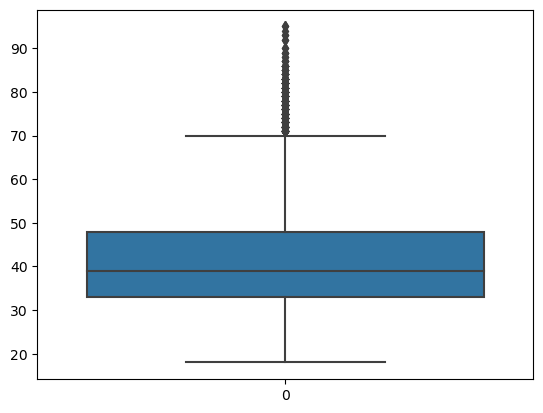

In [19]:
# checking outliers
def checking_outliers(n):
    sns.boxplot(a[n])
checking_outliers("age")

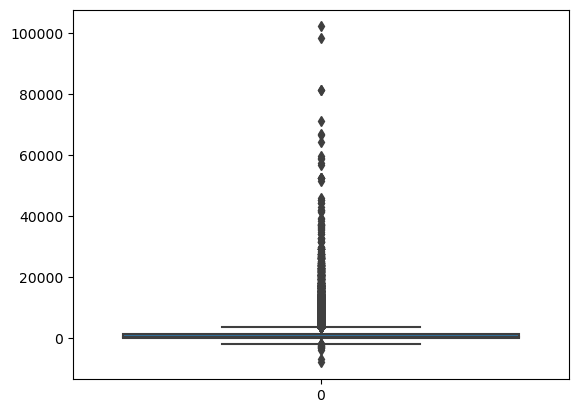

In [20]:
checking_outliers("balance")

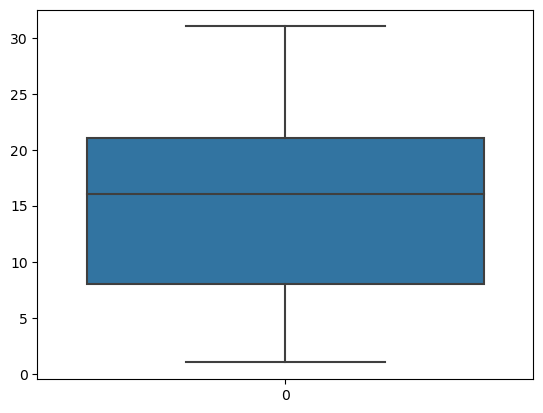

In [21]:
checking_outliers("day")

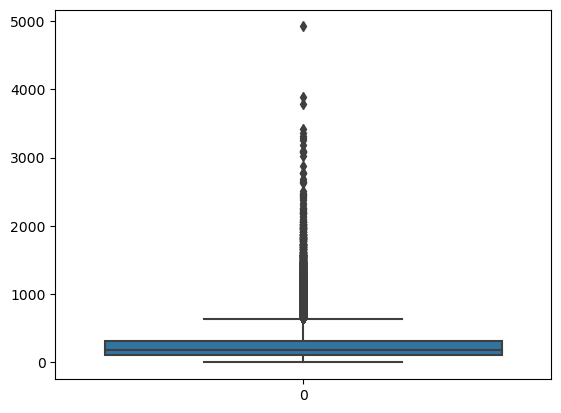

In [22]:
checking_outliers("duration")

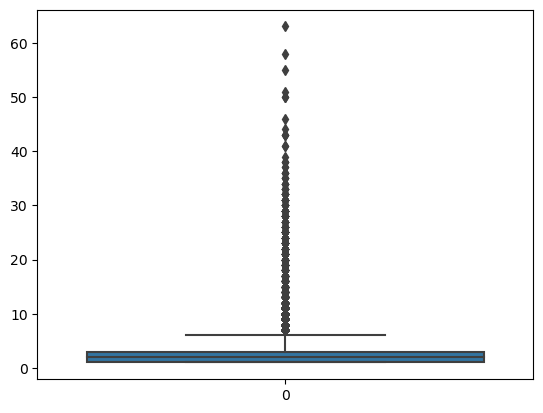

In [23]:
checking_outliers("campaign")

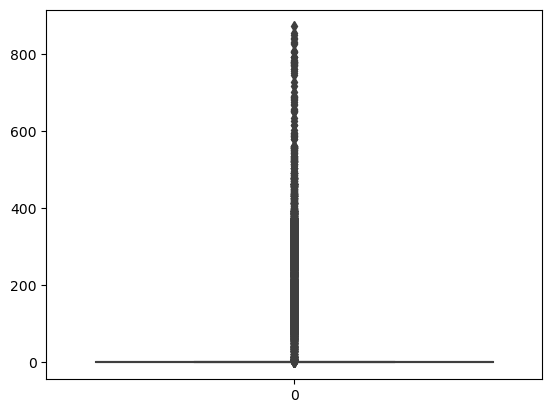

In [24]:
checking_outliers("pdays")

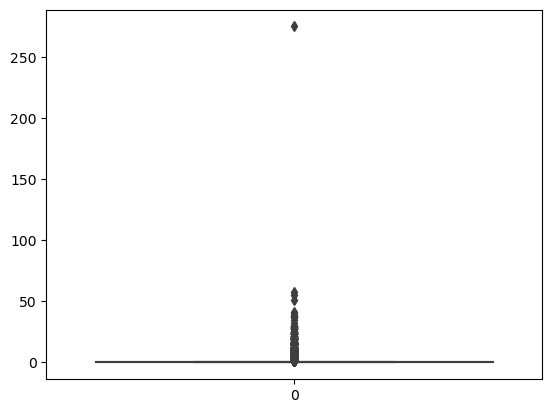

In [25]:
checking_outliers("previous")

## feature engg

In [26]:
a["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [27]:
# convert object datatype to int or float
a["job"].replace({'management':0, 'technician':1, 'entrepreneur':2, 'blue-collar':3,
       'unknown':4, 'retired':5, 'admin.':6, 'services':7, 'self-employed':8,
       'unemployed':9, 'housemaid':10, 'student':11},inplace=True)

In [28]:
le=LabelEncoder()

In [29]:
a["marital"]=le.fit_transform(a["marital"])

In [30]:
a["education"]=le.fit_transform(a["education"])

In [31]:
a["default"].replace({'no':0, 'yes':1},inplace=True)

In [32]:
a["housing"].replace({'no':0, 'yes':1},inplace=True)

In [33]:
a["loan"].replace({'no':0, 'yes':1},inplace=True)

In [34]:
a["contact"].replace({'unknown':0, 'cellular':1, 'telephone':2},inplace=True)

In [35]:
a["month"].replace({"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11},inplace=True)

In [36]:
a["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [37]:
a["poutcome"].replace({'unknown':0, 'failure':1, 'other':2, 'success':3},inplace=True)

In [38]:
a["y"].replace({"no":0,"yes":1},inplace=True)

In [39]:
def handling_outlier(n):
    q1=a[n].quantile(0.25)
    q2=a[n].quantile(0.75)
    iqr=q2-q1
    lowertail=q1-1.5*iqr
    uppertail=q2+1.5*iqr
    for i in (a[n]):
        if i<lowertail:
            a[n].replace({i:lowertail})
        elif i>uppertail:
            a[n].replace({i:uppertail})
handling_outlier("age")

In [40]:
handling_outlier("balance")

In [41]:
handling_outlier("duration")

In [42]:
handling_outlier("campaign")

In [43]:
handling_outlier("pdays")

In [44]:
handling_outlier("previous")

In [45]:
a.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.004262,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.092577,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,0.012238,0.025155
job,0.004262,1.000000,0.018854,-0.248372,-0.007340,-0.029654,-0.041317,-0.012578,0.001588,-0.027535,-0.064629,0.008166,-0.035410,0.007492,-0.006466,0.014057,0.022396
marital,-0.403240,0.018854,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,0.018282,-0.005261,-0.050938,0.011852,-0.008994,0.019172,0.014973,0.031107,0.045588
education,-0.106807,-0.248372,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,0.061039,0.022671,0.054729,0.001935,0.006255,0.000052,0.017570,0.045208,0.066241
default,-0.017879,-0.007340,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,-0.024095,0.009424,0.014989,-0.010021,0.016822,-0.029979,-0.018329,-0.037940,-0.022419
balance,0.097783,-0.029654,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,0.047701,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,0.037272,0.052838
housing,-0.185513,-0.041317,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,-0.207722,-0.027982,-0.173887,0.005075,-0.023599,0.124178,0.037076,-0.000527,-0.139173
loan,-0.015655,-0.012578,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,0.000058,0.011370,0.021638,-0.012412,0.009980,-0.022754,-0.011043,-0.047586,-0.068185
contact,0.092577,0.001588,0.018282,0.061039,-0.024095,0.047701,-0.207722,0.000058,1.000000,0.038643,0.167103,0.001494,0.020046,0.210651,0.139518,0.221644,0.130590
day,-0.009120,-0.027535,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,0.038643,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,-0.072629,-0.028348


## feature selection

In [46]:
a=a.drop(["default","day","campaign"],axis=1)
a

,age,job,marital,education,balance,housing,loan,contact,month,duration,pdays,previous,poutcome,y
0,58,0,1,2,2143,1,0,0,4,261,-1,0,0,0
1,44,1,2,1,29,1,0,0,4,151,-1,0,0,0
2,33,2,1,1,2,1,1,0,4,76,-1,0,0,0
3,47,3,1,3,1506,1,0,0,4,92,-1,0,0,0
4,33,4,2,3,1,0,0,0,4,198,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,2,825,0,0,1,10,977,-1,0,0,1
45207,71,5,0,0,1729,0,0,1,10,456,-1,0,0,1
45208,72,5,1,1,5715,0,0,1,10,1127,184,3,3,1
45209,57,3,1,1,668,0,0,2,10,508,-1,0,0,0


In [47]:
b=a.drop("y",axis=1)

In [48]:
vif_df=pd.DataFrame()
vif_df["columns"]=b.columns
vif_df

,columns
0,age
1,job
2,marital
3,education
4,balance
5,housing
6,loan
7,contact
8,month
9,duration


In [49]:
l=[]
for i in range(b.shape[1]):
    vif=variance_inflation_factor(b.to_numpy(),i)
    l.append(vif)
vif_df["vifscore"]=l

In [50]:
vif_df

,columns,vifscore
0,age,8.211704
1,job,2.308828
2,marital,4.008193
3,education,3.648005
4,balance,1.238525
5,housing,2.172751
6,loan,1.199348
7,contact,3.410493
8,month,5.503518
9,duration,1.970075


In [51]:
x=b
y=a["y"]


<Axes: xlabel='y', ylabel='count'>

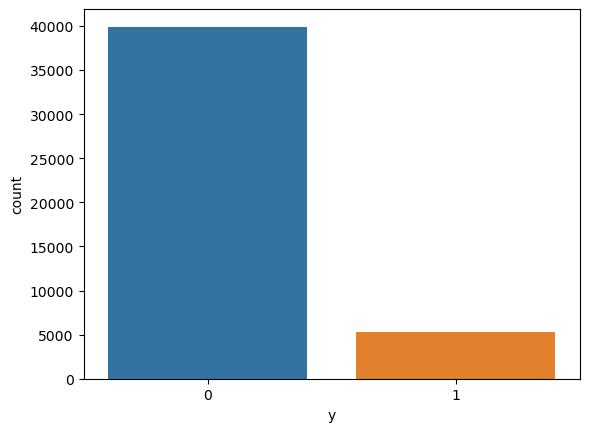

In [52]:
sns.countplot(x=a["y"])

## model training

In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

In [54]:
lg=LogisticRegression()
lg

LogisticRegression()

In [55]:
lgm=lg.fit(xtrain,ytrain)
lgm

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
ytp=lgm.predict(xtrain)
ytp

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [57]:
accu=accuracy_score(ytrain,ytp)
print(accu)
con=confusion_matrix(ytrain,ytp)
print(con)
classification=classification_report(ytrain,ytp)
print(classification)

0.8935523114355232
[[31146   791]
 [ 3059  1172]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     31937
           1       0.60      0.28      0.38      4231

    accuracy                           0.89     36168
   macro avg       0.75      0.63      0.66     36168
weighted avg       0.87      0.89      0.88     36168



In [58]:
ytep=lgm.predict(xtest)
ytep

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
accu=accuracy_score(ytest,ytep)
print(accu)
con=confusion_matrix(ytest,ytep)
print(con)
classification=classification_report(ytest,ytep)
print(classification)

0.8968262744664381
[[7814  171]
 [ 762  296]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.63      0.28      0.39      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043



In [60]:
x=b
y=a["y"]
x

,age,job,marital,education,balance,housing,loan,contact,month,duration,pdays,previous,poutcome
0,58,0,1,2,2143,1,0,0,4,261,-1,0,0
1,44,1,2,1,29,1,0,0,4,151,-1,0,0
2,33,2,1,1,2,1,1,0,4,76,-1,0,0
3,47,3,1,3,1506,1,0,0,4,92,-1,0,0
4,33,4,2,3,1,0,0,0,4,198,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,1,2,825,0,0,1,10,977,-1,0,0
45207,71,5,0,0,1729,0,0,1,10,456,-1,0,0
45208,72,5,1,1,5715,0,0,1,10,1127,184,3,3
45209,57,3,1,1,668,0,0,2,10,508,-1,0,0


In [61]:
xtrain,xtest,ytarin,ytest=train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

In [62]:
dt=DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [63]:
dtm=dt.fit(xtrain,ytrain)
dtm

DecisionTreeClassifier()

1.0
[[31937     0]
 [    0  4231]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31937
           1       1.00      1.00      1.00      4231

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



<Axes: >

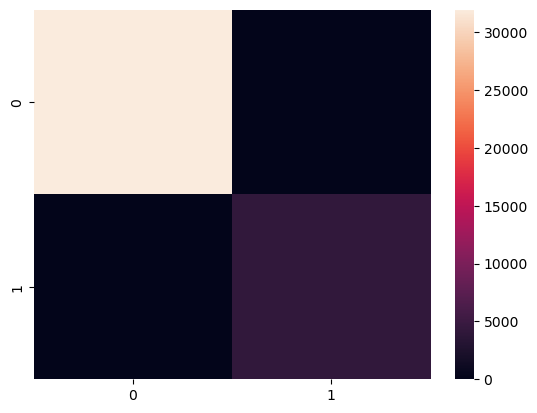

In [64]:
ytrain_pre=dtm.predict(xtrain)
acc=accuracy_score(ytrain,ytrain_pre)
print(acc)
confusion=confusion_matrix(ytrain,ytrain_pre)
print(confusion)
clas=classification_report(ytrain,ytrain_pre)
print(clas)
sns.heatmap(confusion)

0.8682959194957426
[[7345  640]
 [ 551  507]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7985
           1       0.44      0.48      0.46      1058

    accuracy                           0.87      9043
   macro avg       0.69      0.70      0.69      9043
weighted avg       0.87      0.87      0.87      9043



<Axes: >

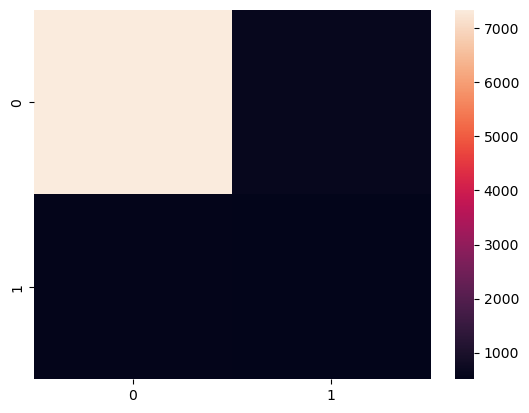

In [65]:
ytest_pred=dtm.predict(xtest)
acc=accuracy_score(ytest,ytest_pred)
print(acc)
confusion=confusion_matrix(ytest,ytest_pred)
print(confusion)
clas=classification_report(ytest,ytest_pred)
print(clas)
sns.heatmap(confusion)

In [66]:
hyperparameters={"criterion":["entropy","gini"],
                "max_depth":np.arange(2,10),
                "min_samples_split":np.arange(2,20),
                "min_samples_leaf":np.arange(2,20)
    
}

In [67]:
rr_model=GridSearchCV(dtm,hyperparameters,cv=5)

In [68]:
rr_model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [69]:
rr_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=7,
                       min_samples_split=17)

In [70]:
ddttmm=DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=7,
                       min_samples_split=17)

In [71]:
ddttmm.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=7,
                       min_samples_split=17)

In [72]:
ypredicted=ddttmm.predict(xtrain)

0.9055518690555187
[[31262   675]
 [ 2741  1490]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     31937
           1       0.69      0.35      0.47      4231

    accuracy                           0.91     36168
   macro avg       0.80      0.67      0.71     36168
weighted avg       0.89      0.91      0.89     36168



<Axes: >

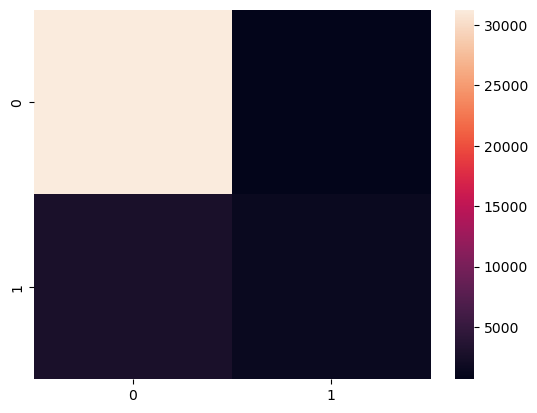

In [73]:
acc=accuracy_score(ytrain,ypredicted)
print(acc)
confusion=confusion_matrix(ytrain,ypredicted)
print(confusion)
clas=classification_report(ytrain,ypredicted)
print(clas)
sns.heatmap(confusion)

In [74]:
ytested=ddttmm.predict(xtest)

0.900807254229791
[[7804  181]
 [ 716  342]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.65      0.32      0.43      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.89      0.90      0.89      9043



<Axes: >

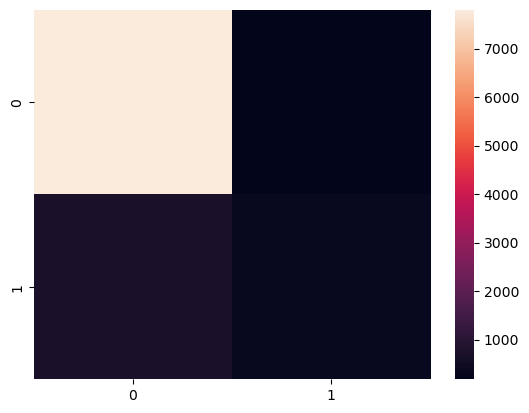

In [75]:
acc=accuracy_score(ytest,ytested)
print(acc)
confusion=confusion_matrix(ytest,ytested)
print(confusion)
clas=classification_report(ytest,ytested)
print(clas)
sns.heatmap(confusion)

In [79]:
def user_defined():
    age=int(input("enter age = "))
    job=int(input("enetr job in num = "))
    marital=int(input("enter marital status = "))
    education=int(input("enter education = "))
    balance=float(input("enter average yearly balance = "))
    housing=int(input("has housing loan = "))
    loan=int(input("enter loan = "))
    contact=int(input("enter contact type = "))
    month=int(input("enter month no. = "))
    duration=int(input("eneter duration of last call = "))
    pdays=int(input("enter no. days passed since last call = "))
    previous=int(input("enter no. contact performed before = "))
    poutcome=int(input("enter the outcome on basis of previous campaign = "))
    dff=pd.DataFrame({'age':[age], 'job':[job], 'marital':[marital], 'education':[education], 'balance':[balance], 'housing':[housing], 'loan':[loan],
       'contact':[contact], 'month':[month], 'duration':[duration], 'pdays':[pdays], 'previous':[previous], 'poutcome':[poutcome]})
    print(f"if the client will subscribe a term deposit = {dtm.predict(dff)}")

In [83]:
user_defined()

enter age = 55
enetr job in num = 1
enter marital status = 0
enter education = 0
enter average yearly balance = 5
has housing loan = 0
enter loan = 1
enter contact type = 1
enter month no. = 2
eneter duration of last call = 115
enter no. days passed since last call = 1
enter no. contact performed before = 1
enter the outcome on basis of previous campaign = 1
if the client will subscribe a term deposit = [0]


In [81]:
def user_ddefined():
    age=int(input("enter age = "))
    job=int(input("enetr job in num = "))
    marital=int(input("enter marital status = "))
    education=int(input("enter education = "))
    balance=float(input("enter average yearly balance = "))
    housing=int(input("has housing loan = "))
    loan=int(input("enter loan = "))
    contact=int(input("enter contact type = "))
    month=int(input("enter month no. = "))
    duration=int(input("eneter duration of last call = "))
    pdays=int(input("enter no. days passed since last call = "))
    previous=int(input("enter no. contact performed before = "))
    poutcome=int(input("enter the outcome on basis of previous campaign = "))
    dff=pd.DataFrame({'age':[age], 'job':[job], 'marital':[marital], 'education':[education], 'balance':[balance], 'housing':[housing], 'loan':[loan],
       'contact':[contact], 'month':[month], 'duration':[duration], 'pdays':[pdays], 'previous':[previous], 'poutcome':[poutcome]})
    print(f"if the client will subscribe a term deposit = {ddttmm.predict(dff)}")

In [82]:
user_ddefined()

enter age = 58
enetr job in num = 0
enter marital status = 1
enter education = 2
enter average yearly balance = 2143
has housing loan = 1
enter loan = 0
enter contact type = 0
enter month no. = 4
eneter duration of last call = 261
enter no. days passed since last call = -1
enter no. contact performed before = 0
enter the outcome on basis of previous campaign = 0
if the client will subscribe a term deposit = [0]
